In [878]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import ndimage
import json
import time
import os
from PIL import Image


In [879]:
# pip install scikit-learn instead of sklearn
from sklearn import preprocessing


# 模板

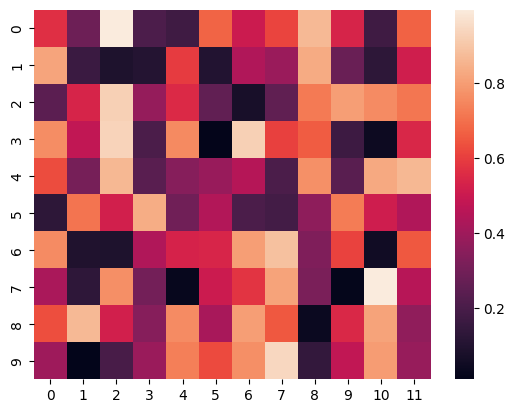

In [880]:
uniform_data = np.random.rand(10, 12)  # 自定义数据
ax = sns.heatmap(uniform_data)


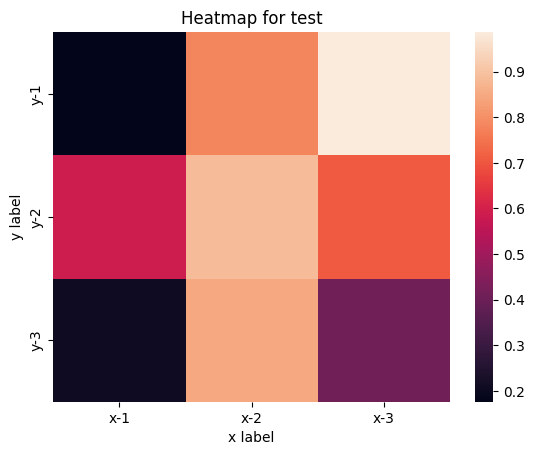

In [881]:
values = np.random.rand(3, 3)
x_ticks = ['x-1', 'x-2', 'x-3']
y_ticks = ['y-1', 'y-2', 'y-3']  # 自定义横纵轴
ax = sns.heatmap(values, xticklabels=x_ticks, yticklabels=y_ticks)
ax.set_title('Heatmap for test')  # 图标题
ax.set_xlabel('x label')  # x轴标题
ax.set_ylabel('y label')
plt.show()
figure = ax.get_figure()
# figure.savefig('sns_heatmap.jpg')  # 保存图片


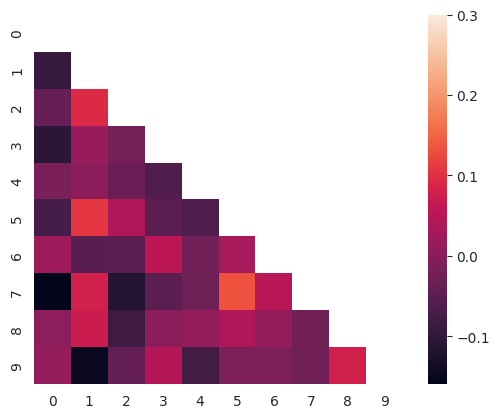

In [882]:
# 使用掩码，绘制部分数据
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


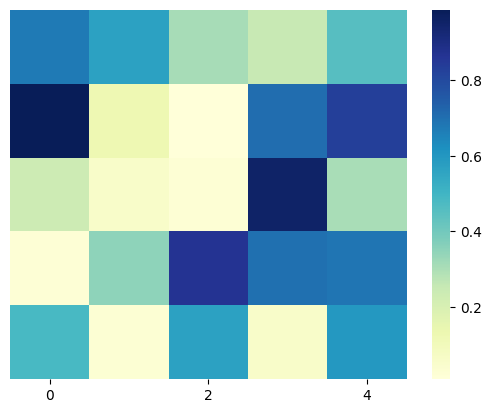

In [883]:
values = np.random.rand(5, 5)
ax = sns.heatmap(values, cmap="YlGnBu", xticklabels=2,
                 yticklabels=False)  # x轴变2倍，隐藏y轴


# 实现

## 师兄的代码

In [884]:
min_max_scaler = preprocessing.MinMaxScaler()


In [885]:
class HeatMap:
    def __init__(self):
        # 根据时间生成随机数，保证每次都不一样
        np.random.seed(int(time.time()))
        self.fig, self.axes = plt.subplots()

    def plot_heatmap(self, img, heatmap):
        print("Image shape", img.shape)
        normalized_heat_map = self.get_heatmap_array(img, heatmap)
        # 去除坐标轴
        # self.axes.cla()
        self.axes.imshow(img)
        # self.axes.imshow(255 * normalized_heat_map, alpha=0.5, cmap="RdBu")
        # self.axes.set_axis_off()
        self.axes = sns.heatmap(255 * normalized_heat_map, cmap='Set1_r',
                                ax=self.axes, annot=False, fmt='0.1g', alpha=0.5)
        plt.show()

    def get_heatmap_array(self, img, heat):
        height, width, _ = img.shape
        print(height, width)
        print(heat[:10])
        heat[:, 0] *= height
        heat[:, 1] *= width
        print(heat[:10])
        x = np.zeros((height, width))

        def count_heat(i):
            try:
                x[int(i[0]), int(i[1])] += 1
            except:
                pass
        # 必选参数：func,axis,arr。其中func是我们自定义的一个函数，函数func(arr)中的arr是一个数组，函数的主要功能就是对数组里的每一个元素进行变换，得到目标的结果。其中axis表示函数func对数组arr作用的轴。
        np.apply_along_axis(count_heat, axis=1, arr=heat)
        heat_map = ndimage.gaussian_filter(x, sigma=15)
        # 归一化
        normalized_heat_map = min_max_scaler.fit_transform(heat_map)
        return normalized_heat_map

    @staticmethod
    def get_json_file():
        # current_work_dir = os.path.abspath(os.path.dirname(os.path.dirname(__file__)))
        current_work_dir = '..'
        json_path = os.path.join(current_work_dir, 'gaze.json')
        with open(json_path, 'r+') as f:
            data = json.load(f)
        gaze = np.asarray([gaze['gaze'] for gaze in data['data']], dtype=np.float32)
        return gaze


In [886]:
gaze = HeatMap.get_json_file()
gaze[:10]


array([[ -8.102242 ,  -4.2731075],
       [-13.25182  ,   9.2878685],
       [-12.19583  ,  -0.9565588],
       [-12.613265 ,   6.998412 ],
       [-12.269265 ,  -2.733451 ],
       [-12.849673 ,   6.0354905],
       [-12.209388 ,  -0.5942724],
       [-12.865291 ,   3.9535327],
       [-12.622834 ,   1.2091686],
       [-12.265867 ,   8.253282 ]], dtype=float32)

## 0-1 归一化

In [887]:
data_train_nomal = min_max_scaler.fit_transform(gaze)


In [888]:
min_max_scaler.scale_
min_max_scaler.min_


array([1.2455665 , 0.51262546], dtype=float32)

In [889]:
data_train_nomal[:10]


array([[0.50985485, 0.46417326],
       [0.0422554 , 0.61793935],
       [0.13814294, 0.50177914],
       [0.10023844, 0.5919795 ],
       [0.13147473, 0.48163122],
       [0.07877171, 0.58106107],
       [0.13691187, 0.5058871 ],
       [0.0773536 , 0.55745405],
       [0.09936953, 0.5263361 ],
       [0.13178337, 0.6062083 ]], dtype=float32)

Image shape (768, 1024, 3)
768 1024
[[0.50985485 0.46417326]
 [0.0422554  0.61793935]
 [0.13814294 0.50177914]
 [0.10023844 0.5919795 ]
 [0.13147473 0.48163122]
 [0.07877171 0.58106107]
 [0.13691187 0.5058871 ]
 [0.0773536  0.55745405]
 [0.09936953 0.5263361 ]
 [0.13178337 0.6062083 ]]
[[391.56854  475.31342 ]
 [ 32.45215  632.7699  ]
 [106.09378  513.82184 ]
 [ 76.98312  606.187   ]
 [100.972595 493.19037 ]
 [ 60.496674 595.00653 ]
 [105.148315 518.0284  ]
 [ 59.407562 570.83295 ]
 [ 76.315796 538.96814 ]
 [101.209625 620.7573  ]]


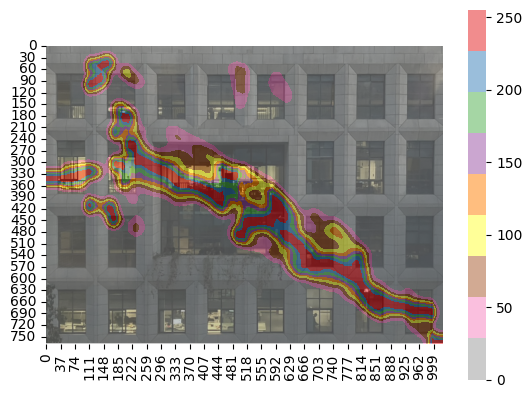

In [890]:
heatmap = HeatMap()
img = np.array(Image.open('1.jpeg'))
heatmap.plot_heatmap(img, data_train_nomal)
